# Preparing Images

In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from PIL import Image

In [ ]:
# Create directories for dataset
os.makedirs("data/bouba", exist_ok=True)
os.makedirs("data/kiki", exist_ok=True)

def generate_bouba(save_path):
    num_points = 100
    theta = np.linspace(0, 2*np.pi, num_points, endpoint=False)
    coef_0 = random.uniform(1, 3)
    coef_1 = random.uniform(2, 6)
    coef_2 = random.uniform(2, 6)
    r = coef_0 + np.sin(coef_1*theta) + np.cos(coef_2*theta)

    taper_length = 10
    taper = np.linspace(0, np.pi, taper_length)
    weight = (1 + np.cos(taper)) / 2

    r[-taper_length:] = r[-taper_length:] * weight + (1 - weight) * (coef_0 + 1)
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    plt.fill(x, y, color='black')
    plt.axis("equal")
    plt.axis("off")
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

def generate_kiki(save_path):
    num_points = 30
    theta = np.linspace(0, 2*np.pi, num_points, endpoint=False)
    r = [random.uniform(0.5, 1.5) for _ in range(num_points)]

    x = r * np.cos(theta)
    y = r * np.sin(theta)

    plt.fill(x, y, color='black')
    plt.axis("equal")
    plt.axis("off")
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

def rotate_and_save(image_path, rotation_angle, new_path):
    """Loads an image, rotates it, and saves it to the new path."""
    img = Image.open(image_path)
    rotated = img.rotate(rotation_angle)
    rotated.save(new_path)

# Number of images per transformation step
num_images = 1000
rotations = [0, 90, 180, 270]

# Generate dataset
for rot_idx, angle in enumerate(rotations):
    for i in tqdm(range(num_images)):
        base_index = rot_idx * num_images + i
        bouba_path = f"data/bouba/bouba_{base_index}.png"
        kiki_path = f"data/kiki/kiki_{base_index}.png"
        
        if angle == 0:
            generate_bouba(bouba_path)
            generate_kiki(kiki_path)
        else:
            original_bouba_path = f"data/bouba/bouba_{i}.png"
            original_kiki_path = f"data/kiki/kiki_{i}.png"
            rotate_and_save(original_bouba_path, angle, bouba_path)
            rotate_and_save(original_kiki_path, angle, kiki_path)

print("Dataset generation complete!")


## Demonstration

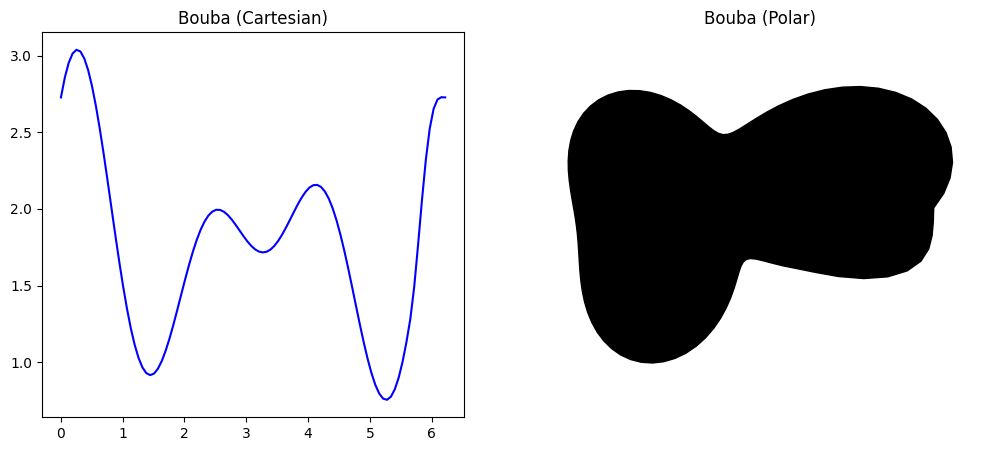

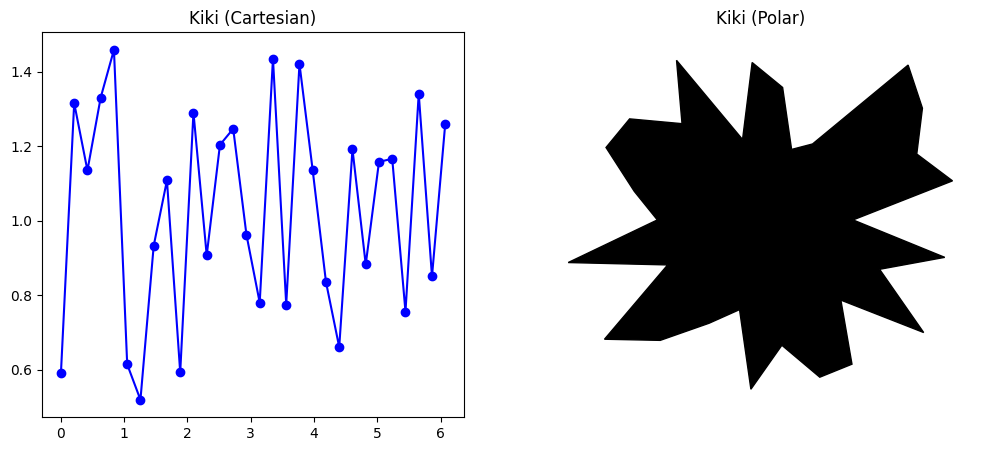

In [22]:
def plot_bouba():
    num_points = 100
    theta = np.linspace(0, 2*np.pi, num_points, endpoint=False)
    
    coef_0 = random.uniform(1, 3)
    coef_1 = random.uniform(2, 6)
    coef_2 = random.uniform(2, 6)
    
    r = coef_0 + np.sin(coef_1 * theta) + np.cos(coef_2 * theta)
    
    taper_length = 10
    taper = np.linspace(0, np.pi, taper_length)
    weight = (1 + np.cos(taper)) / 2
    r[-taper_length:] = r[-taper_length:] * weight + (1 - weight) * (coef_0 + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(theta, r, color='blue')
    plt.title("Bouba (Cartesian)")
    
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    plt.subplot(1, 2, 2)
    plt.fill(x, y, color='black')
    plt.title("Bouba (Polar)")
    plt.axis("equal")
    plt.axis("off")
    plt.show()

def plot_kiki():
    num_points = 30
    theta = np.linspace(0, 2*np.pi, num_points, endpoint=False)
    
    r = np.array([random.uniform(0.5, 1.5) for _ in range(num_points)])
    
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    axes[0].plot(theta, r, 'o-', color='blue')
    axes[0].set_title("Kiki (Cartesian)")
    
    axes[1].fill(x, y, color='black')
    axes[1].set_title("Kiki (Polar)")
    axes[1].axis("equal")
    axes[1].axis("off")
    
    plt.show()

plot_bouba()
plot_kiki()
